In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Dataset Selection
- Taking a Dataset customer_data.csv with Columns like Customer ID: Unique identifier for each customer, Age: Age of the customer, Annual Income: Income in $ (or any currency), Spending Score: A score assigned to customers based on their spending patterns and behavior.

# Step 2: Tasks to Perform
## 1. Load the Dataset

● Using libraries such as Pandas to load the dataset into a DataFrame.
● Inspecting  the dataset by checking its Shape, missing values, duplicates, and data types.

also Summarizing statistics to understand ranges of values.


In [6]:
# Step 1: Load the Dataset
df = pd.read_csv(r"C:\Users\deeks\main flow internship\Task-3\Customers.csv")
df = df[['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)']]
# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

Dataset Shape: (2000, 4)
Missing Values:
 CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64
Duplicates: 0
Data Types:
 CustomerID                int64
Age                       int64
Annual Income ($)         int64
Spending Score (1-100)    int64
dtype: object
Summary Statistics:
         CustomerID          Age  Annual Income ($)  Spending Score (1-100)
count  2000.000000  2000.000000        2000.000000             2000.000000
mean   1000.500000    48.960000      110731.821500               50.962500
std     577.494589    28.429747       45739.536688               27.934661
min       1.000000     0.000000           0.000000                0.000000
25%     500.750000    25.000000       74572.000000               28.000000
50%    1000.500000    48.000000      110045.000000               50.000000
75%    1500.250000    73.000000      149092.750000               75.000000
max    2000.000000    99.000000      189974

## 2. Data Preprocessing
- Standardize the data:
  
○ Use a scaler (e.g., StandardScaler or MinMaxScaler from sklearn) to ensure
all features are on the same scale.

○ This step is crucial since clustering algorithms are sensitive to feature
magnitudes.


In [7]:
# Step 2: Data Preprocessing
features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

## 3. Clustering
-  Determine the optimal number of clusters:

○ Use the Elbow Method:

■ Plot the Within-Cluster Sum of Squares (WCSS) against the number of
clusters.

■ The "elbow point" indicates the optimal number of clusters.

○ Alternatively, use the Silhouette Score for evaluation.

-  Apply K-Means Clustering:
  
○ Use the optimal number of clusters identified from the Elbow Method.

○ Assign a cluster label to each customer.


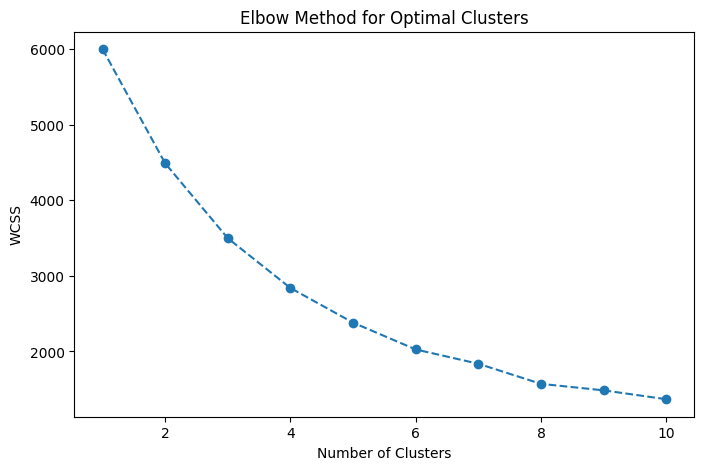

In [8]:
# Step 3: Determine the Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Step 3: Apply K-Means Clustering
optimal_clusters = 3  # Choose based on elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

## 4. Visualization
- Create visualizations to represent the clusters:

○ 2D Scatter Plot:

         ■ Use PCA (Principal Component Analysis) or t-SNE to reduce
               dimensions to two for visualization.

         ■ Plot clusters in different colors.

○ Pair Plots: Visualize relationships between features within clusters.

○ Centroid Visuals: Show the centroid of each cluster for better interpretation.


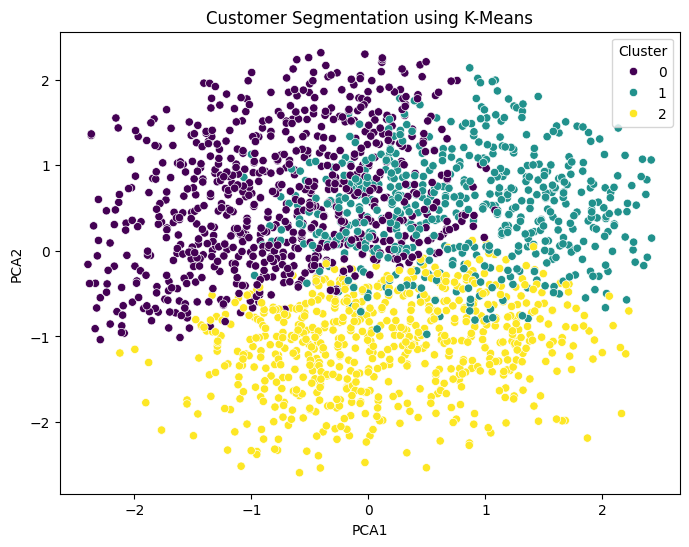

In [9]:
# Step 4: Visualization using PCA for 2D Scatter Plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df)
plt.title('Customer Segmentation using K-Means')
plt.show()

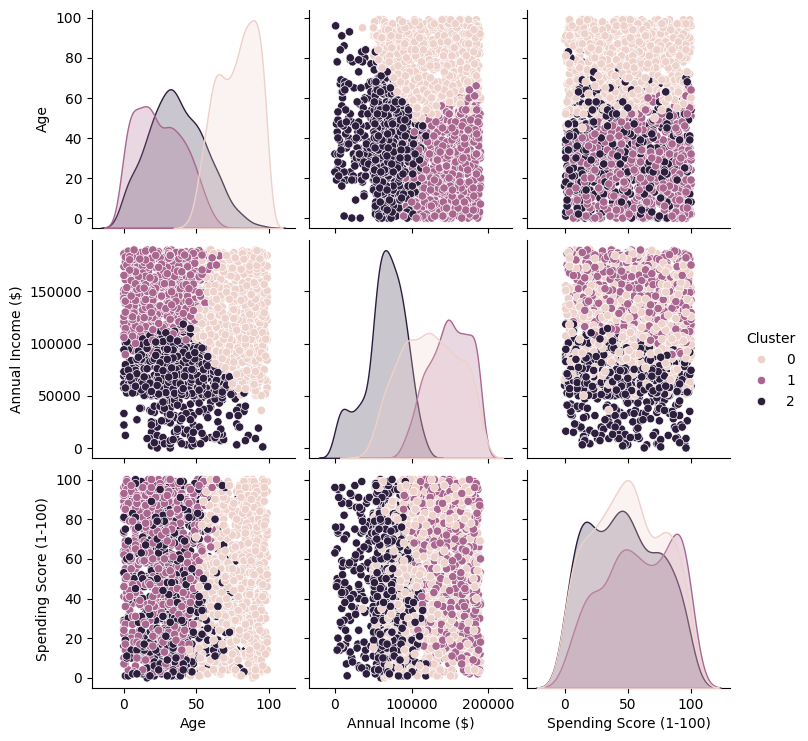

In [10]:
# Pair Plot to visualize relationships
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income ($)', 'Spending Score (1-100)'])
plt.show() 

# Recommendations:


In [11]:
# Step 5: Recommendations
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# Save the clustered dataset
df.to_csv("customer_segmented.csv", index=False)

# Insights:
print("\nBusiness Recommendations:")
print("- Cluster 0: High-income, high-spending customers -> Target for premium products & loyalty programs.")
print("- Cluster 1: Young, moderate-income customers with moderate spending -> Target with discounts & special offers.")
print("- Cluster 2: Low-income, low-spending customers -> Focus on increasing engagement with budget-friendly products.")

Cluster Summary:
           CustomerID        Age  Annual Income ($)  Spending Score (1-100)  \
Cluster                                                                      
0        1131.153947  77.969737      123121.767105               49.693421   
1        1141.650624  24.602496      148907.802139               57.996435   
2         737.639175  36.614138       65322.272459               46.571429   

             PCA1      PCA2  
Cluster                      
0       -0.728862  0.600891  
1        0.813678  0.494187  
2        0.143537 -1.080878  

Business Recommendations:
- Cluster 0: High-income, high-spending customers -> Target for premium products & loyalty programs.
- Cluster 1: Young, moderate-income customers with moderate spending -> Target with discounts & special offers.
- Cluster 2: Low-income, low-spending customers -> Focus on increasing engagement with budget-friendly products.
